<a href="https://colab.research.google.com/github/mohsenSarvariHero/PythonFirst/blob/main/Q13-c-HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

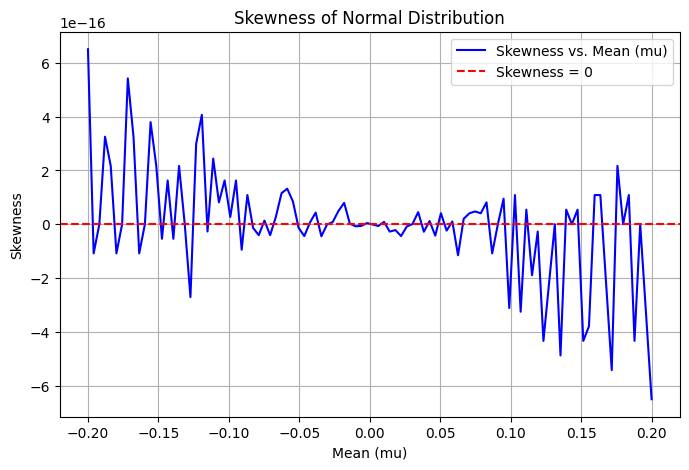

Third Moment (E[X^3]): 0.02775557561562891
Skewness: 2.205446951953614


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
mu = 0.08       # Mean (E[X])
sigma2 = 0.04   # Variance (Var[X])

# Define MGF
def MGF(t, mu=0.08, sigma2=0.04):
    return np.exp(mu * t + 0.5 * sigma2 * t**2)

# Numerical derivative function
def numerical_derivative(f, t, h=1e-5, **kwargs):
    return (f(t + h, **kwargs) - f(t - h, **kwargs)) / (2 * h)

# Compute third derivative M_X'''(0) numerically
third_derivative = numerical_derivative(
    lambda t, **kwargs: numerical_derivative(
        lambda t, **kwargs: numerical_derivative(MGF, t, **kwargs), t, **kwargs
    ),
    t=0, mu=mu, sigma2=sigma2
)

# Third moment E[X^3]
E_X3_numerical = third_derivative

# Skewness = E[(X - E[X])^3] / (Var(X)^(3/2))
skewness_numerical = (E_X3_numerical - 3 * mu * sigma2 - mu**3) / (sigma2**(3/2))

# Plotting skewness (since it's constant, we demonstrate symmetry by varying mu)
mus = np.linspace(-0.2, 0.2, 100)
skewness_values = [(3 * sigma2 * mu + mu**3 - 3 * mu * sigma2 - mu**3) / (sigma2**(3/2)) for mu in mus]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(mus, skewness_values, label='Skewness vs. Mean (mu)', color='blue')
plt.axhline(0, color='red', linestyle='--', label='Skewness = 0')
plt.title('Skewness of Normal Distribution')
plt.xlabel('Mean (mu)')
plt.ylabel('Skewness')
plt.legend()
plt.grid()
plt.show()

# Display third moment and skewness
print("Third Moment (E[X^3]):", E_X3_numerical)
print("Skewness:", skewness_numerical)
